## Evaluation

Here we evaluate the results of sound matching from both the deep learning and genetic algorithms tested.

The MFCCEval class is used to perform an objective evaluation of each audio file generated. This is carried out by measuring error metrics between the MFCCs from the target sounds and the results from sound matching.

The results of this evaluation are saved in a JSON file which summarizes the results for each estimator.

Histogram plots are also used to show the distribution of results produced by each estimator. Histogram plots show the mean absolute error of the sound matched results from each estimator.

In [1]:
import spiegel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the sound targets used for sound matching
targets = spiegel.AudioBuffer.load_folder('./evaluation/audio')

# Load all the estimations of the sound targets made by each estimator
estimations = [spiegel.AudioBuffer.load_folder('./evaluation/mlp'),
               spiegel.AudioBuffer.load_folder('./evaluation/lstm'),
               spiegel.AudioBuffer.load_folder('./evaluation/bi_lstm'),
               spiegel.AudioBuffer.load_folder('./evaluation/cnn'),
               spiegel.AudioBuffer.load_folder('./evaluation/ga'),
               spiegel.AudioBuffer.load_folder('./evaluation/nsga')]

# Evaluate the results and save to JSON file
evaluation = spiegel.evaluation.MFCCEval(targets, estimations)
evaluation.evaluate()
evaluation.save_stats_json('./evaluation/evaluation_stats.json')

#### MLP Histogram

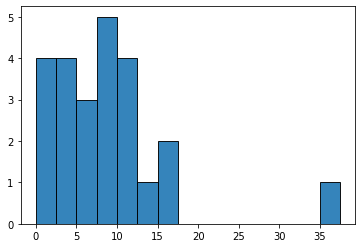

In [3]:
bins = np.arange(0, 40, 2.5)
evaluation.plot_hist([0], 'mean_abs_error', bins)


#### LSTM Histogram

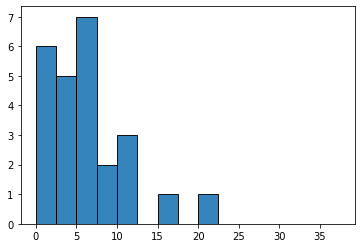

In [4]:
evaluation.plot_hist([1], 'mean_abs_error', bins)

#### LSTM++ Histogram

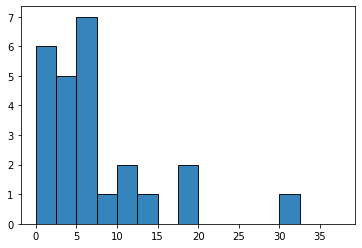

In [5]:
evaluation.plot_hist([2], 'mean_abs_error', bins)

#### CNN Histogram

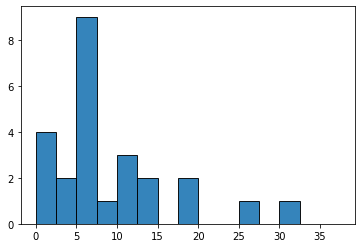

In [6]:
evaluation.plot_hist([3], 'mean_abs_error', bins)

#### GA Histogram 

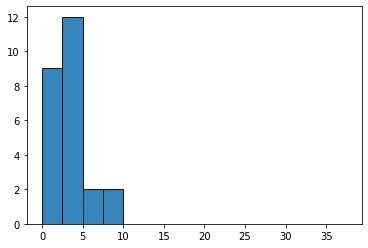

In [7]:
evaluation.plot_hist([4], 'mean_abs_error', bins)

#### NSGA III Histogram

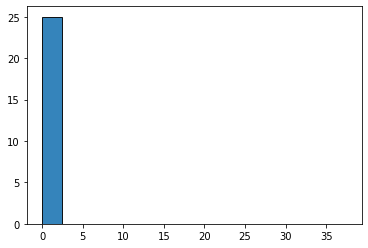

In [8]:
evaluation.plot_hist([5], 'mean_abs_error', bins)